# Importando Bibliotecas

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [72]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.4.2
1.21.5
0.11.2


# Iniciando o Curso

**Primeiro Módulo**

In [73]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [74]:
dados.shape

(76840, 7)

In [75]:
type(dados)

pandas.core.frame.DataFrame

In [76]:
dados.isna().sum().sum()

0

In [77]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [78]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [79]:
dados[['Idade', 'Anos de Estudo', 'Renda', 'Idade']].describe()

,Idade,Anos de Estudo,Renda,Idade
count,76840.000000,76840.000000,76840.000000,76840.000000
mean,44.071421,9.469664,2000.383199,44.071421
std,12.480583,4.539929,3323.387730,12.480583
min,13.000000,1.000000,0.000000,13.000000
25%,34.000000,6.000000,788.000000,34.000000
50%,43.000000,11.000000,1200.000000,43.000000
75%,53.000000,12.000000,2000.000000,53.000000
max,99.000000,17.000000,200000.000000,99.000000


In [80]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [81]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [82]:
dados.Idade.describe()

count    76840.000000
mean        44.071421
std         12.480583
min         13.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         99.000000
Name: Idade, dtype: float64

In [83]:
dados.Altura.describe()

count    76840.000000
mean         1.699512
std          0.079717
min          1.339245
25%          1.645785
50%          1.699325
75%          1.753062
max          2.028497
Name: Altura, dtype: float64

**Segundo Módulo**

In [84]:
dados.Sexo = dados.Sexo.map({0 : 'Homem', 1 : 'Mulher'})

In [85]:
frequencia = dados['Sexo'].value_counts()

In [86]:
percentual = dados['Sexo'].value_counts(normalize = True)

In [87]:
cor = {
    0 : 'Indígena',
    2 : 'Branca',
    4 : 'Preta',
    5 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
}

In [88]:
dados.Cor = dados.Cor.map(cor)

In [89]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Homem,23,Parda,12,800,1.603808
1,11,Mulher,23,Branca,12,1150,1.739790
2,11,Mulher,35,Parda,15,880,1.760444
3,11,Homem,46,Branca,6,3500,1.783158
4,11,Mulher,47,Parda,9,150,1.690631


In [90]:
dados['Cor'].value_counts(normalize = True)

Parda       0.469682
Branca      0.415948
Preta       0.109703
Indígena    0.004667
Name: Cor, dtype: float64

In [91]:
dados['Cor'].value_counts()

Parda       35925
Branca      31815
Preta        8391
Indígena      357
Name: Cor, dtype: int64

In [92]:
df1 = pd.crosstab(dados.Sexo, dados.Cor)

In [93]:
dados.Cor.value_counts()[['Parda', 'Preta']].sum()

44316

In [94]:
dados.Cor.value_counts().Branca.sum()

31815

In [95]:
df1['Soma'] = (pd.crosstab(dados.Cor, dados.Sexo).Homem.sum(),
pd.crosstab(dados.Cor, dados.Sexo).Mulher.sum())

In [96]:
pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'mean', values = dados.Renda).round(2)

Cor,Branca,Indígena,Parda,Preta
Sexo,,,,
Homem,2925.74,1081.71,1659.58,1603.86
Mulher,2109.87,2464.39,1176.76,1134.60


In [97]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Homem,23,Parda,12,800,1.603808
1,11,Mulher,23,Branca,12,1150,1.739790
2,11,Mulher,35,Parda,15,880,1.760444
3,11,Homem,46,Branca,6,3500,1.783158
4,11,Mulher,47,Parda,9,150,1.690631


In [98]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [99]:
labels = ['E', 'D', 'C', 'B', 'A']

In [100]:
dados['Classe'] = pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True)

In [101]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,Homem,23,Parda,12,800,1.603808,E
1,11,Mulher,23,Branca,12,1150,1.739790,E
2,11,Mulher,35,Parda,15,880,1.760444,E
3,11,Homem,46,Branca,6,3500,1.783158,C
4,11,Mulher,47,Parda,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,Mulher,46,Branca,11,812,1.687030,E
76836,53,Homem,30,Preta,7,1500,1.792934,E
76837,53,Homem,32,Parda,12,1300,1.830587,E
76838,53,Homem,57,Parda,4,1500,1.726344,E


In [102]:
pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [103]:
dados.Classe.value_counts(normalize=True)

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Classe, dtype: float64

In [104]:
n = dados.shape[0]
n

76840

In [105]:
k = int((1 + (10/3) * np.log10(n)).round())

In [106]:
k

17

In [107]:
freq = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False
)

In [108]:
percen = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)

In [109]:
percen

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [110]:
dist_freq_quantitativas_aplitude_fixa = pd.DataFrame(
    {'Frequencia' : freq, 'Porcentagem (%)' : percen})
dist_freq_quantitativas_aplitude_fixa

,Frequencia,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


C:\Users\pedro\anaconda3\envs\alura_pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='metros'>

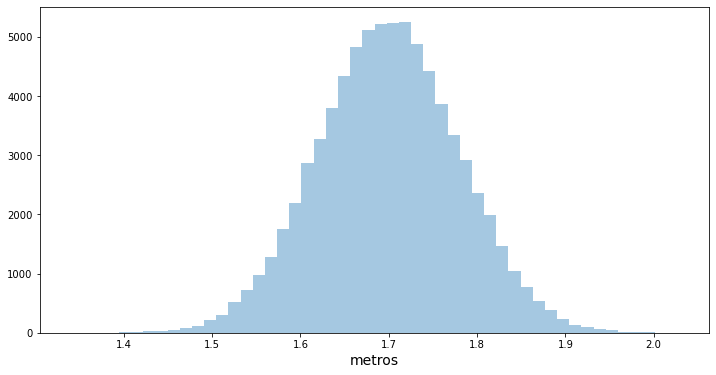

In [111]:
ax = sns.distplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('metros', fontsize = 14)
ax

<AxesSubplot:xlabel='classe', ylabel='pessoas'>

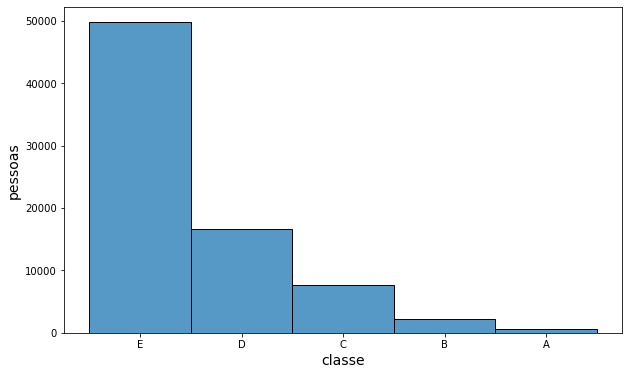

In [112]:
ax = sns.histplot(dados.Classe)
ax.figure.set_size_inches(10,6)
ax.set_xlabel('classe', fontsize = 14)
ax.set_ylabel('pessoas', fontsize = 14)
ax

**Terceiro Módulo**

In [113]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [114]:
df.Fulano.mean()

7.714285714285714

In [115]:
dados.Renda.mean()

2000.3831988547631

In [116]:
dados.groupby(['Sexo'])[['Renda', 'Altura']].mean()

,Renda,Altura
Sexo,,
Homem,2192.441596,1.699443
Mulher,1566.847393,1.699670


In [117]:
notas_fulano = df.Fulano

In [118]:
notas_fulano = notas_fulano.sort_values()
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [119]:
n = notas_fulano.shape[0]
n

7

In [120]:
elemento_md = (n + 1) / 2
elemento_md

4.0

In [121]:
notas_fulano.loc[elemento_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [122]:
renda_sort = dados.Renda.sort_values()

In [123]:
renda_sort

7140          0
62721         0
62722         0
35411         0
35400         0
          ...  
32379    100000
43694    120000
56141    200000
28110    200000
43693    200000
Name: Renda, Length: 76840, dtype: int64

In [124]:
n = renda_sort.shape[0]
n

76840

In [125]:
elemento_md = n / 2
elemento_md

38420.0

In [126]:
dados.Renda.loc[elemento_md -1]

500

In [127]:
dados.Renda.median()

1200.0

In [128]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,Homem,23,Parda,12,800,1.603808,E
1,11,Mulher,23,Branca,12,1150,1.739790,E
2,11,Mulher,35,Parda,15,880,1.760444,E
3,11,Homem,46,Branca,6,3500,1.783158,C
4,11,Mulher,47,Parda,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,Mulher,46,Branca,11,812,1.687030,E
76836,53,Homem,30,Preta,7,1500,1.792934,E
76837,53,Homem,32,Parda,12,1300,1.830587,E
76838,53,Homem,57,Parda,4,1500,1.726344,E


In [129]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

In [130]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

C:\Users\pedro\anaconda3\envs\alura_pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

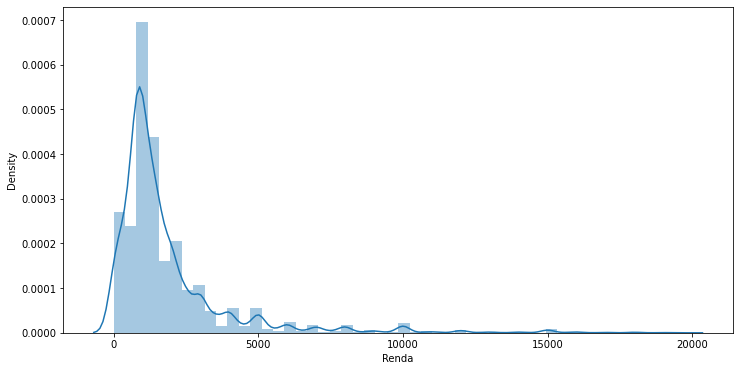

In [131]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [132]:
moda = dados.Renda.mode()[0]
moda

788

In [133]:
mediana = dados.Renda.median()
mediana

1200.0

In [134]:
media = dados.Renda.mean()
media

2000.3831988547631

In [135]:
moda < mediana < media

True

Assimetria a direita

<AxesSubplot:xlabel='Altura', ylabel='Count'>

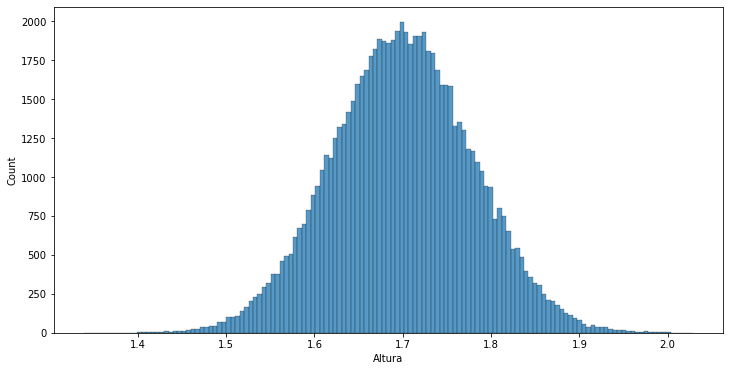

In [136]:
ax = sns.histplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [137]:
moda = dados.Altura.mode()
moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [138]:
mediana = dados.Altura.median()
mediana

1.6993247325

In [139]:
media = dados.Altura.mean()
media

1.6995124540575812

In [140]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [141]:
[i / 10 for i in range (1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [142]:
dados.Renda.quantile([i / 10 for i in range (1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [143]:
dados.Renda.quantile([i / 100 for i in range (1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

**Quarto Módulo**

C:\Users\pedro\anaconda3\envs\alura_pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

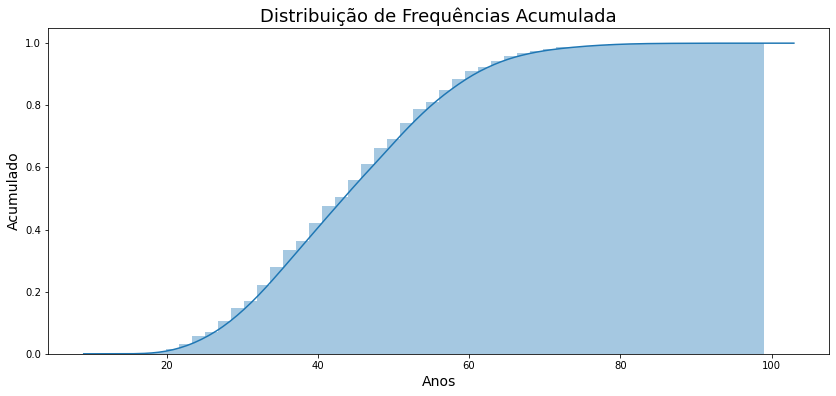

In [144]:
ax = sns.distplot(dados.Idade, 
                  hist_kws = {'cumulative' : True}, 
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

C:\Users\pedro\anaconda3\envs\alura_pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

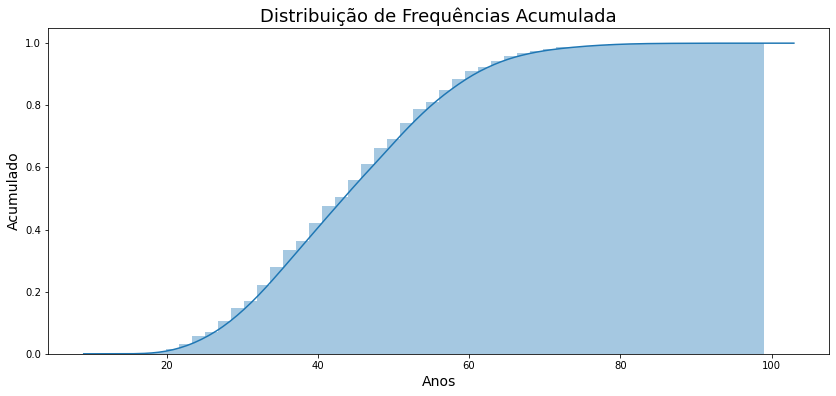

In [145]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

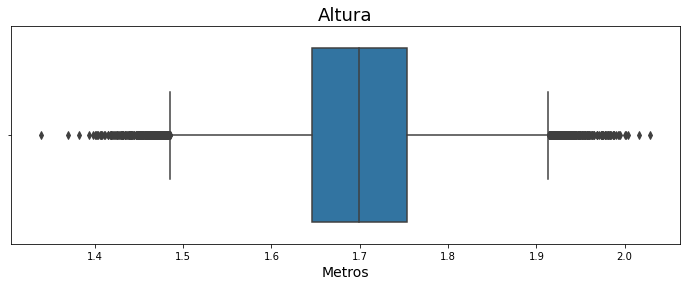

In [146]:
ax = sns.boxplot(x='Altura', data=dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros', ylabel='Sexo'>

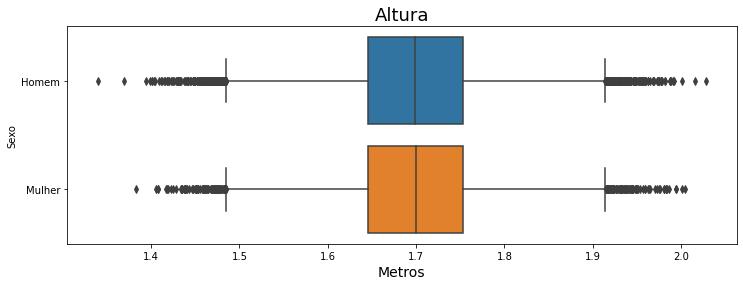

In [147]:
ax = sns.boxplot(x='Altura', y='Sexo',data=dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

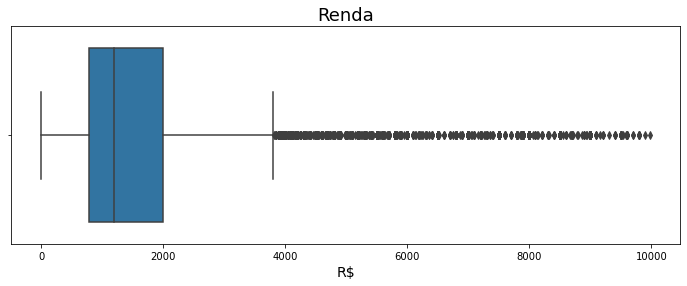

In [148]:
ax = sns.boxplot(x='Renda', data=dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

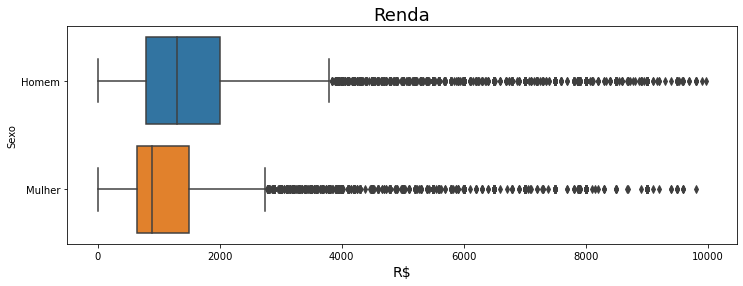

In [149]:
ax = sns.boxplot(x='Renda', y='Sexo',data=dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos'>

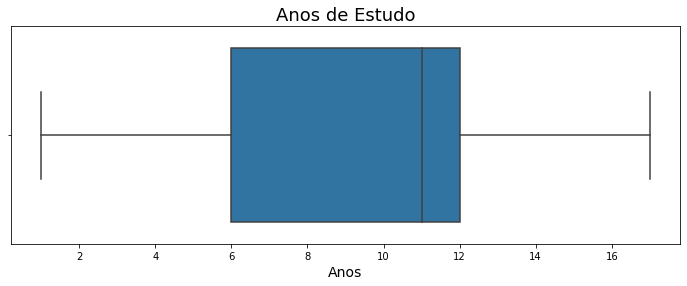

In [150]:
ax = sns.boxplot(x='Anos de Estudo', data=dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

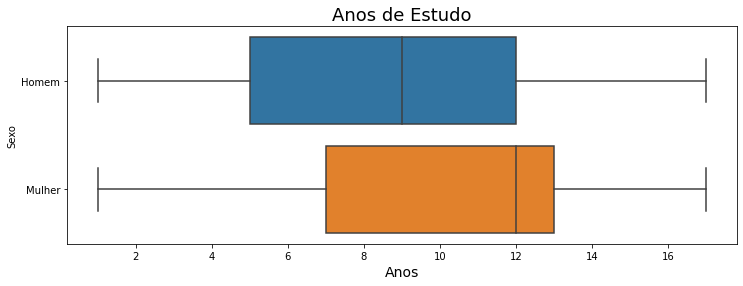

In [151]:
ax = sns.boxplot(x='Anos de Estudo', y='Sexo',data=dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

**Quinto Módulo**

In [152]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [153]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [154]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [159]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [161]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [162]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

C:\Users\pedro\AppData\Local\Temp\ipykernel_16348\349761232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [163]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [165]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [167]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [169]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

In [170]:
desvio_medio_absoluto

Matérias
Fulano      2.138090
Desvio      2.138090
|Desvio|    1.328465
dtype: float64

In [171]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [172]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [173]:
notas_fulano['Fulano'].var()

4.57142857142857

In [174]:
np.sqrt(notas_fulano['Fulano'].var())

2.1380899352993947

In [175]:
notas_fulano['Fulano'].std()

2.1380899352993947

In [176]:
df.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64

In [177]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [187]:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64